# Principal compoenent analysis(PCA)

In [96]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [97]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

## 01. 데이터 준비

In [98]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [99]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [100]:
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data, columns = columns)
irisDF['target'] = iris.target
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [101]:
print(irisDF.shape)
print(set(irisDF['target']))
print(iris.target_names)

(150, 5)
{0, 1, 2}
['setosa' 'versicolor' 'virginica']


## 02. 데이터 탐색

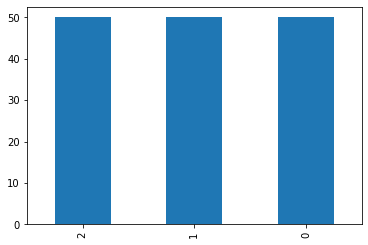

In [102]:
irisDF['target'].value_counts().plot(kind='bar')
plt.show()

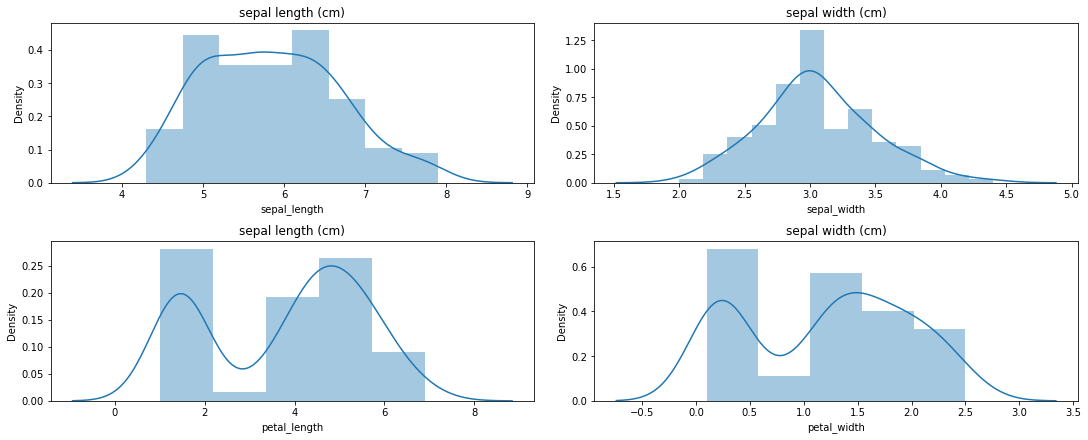

In [103]:
f, ax = plt.subplots(figsize=(15,6), nrows=2, ncols=2,constrained_layout=True)

sns.distplot(irisDF['sepal_length'], ax=ax[0][0])
ax[0][0].set_title(feature_names[0])
sns.distplot(irisDF['sepal_width'], ax=ax[0][1])
ax[0][1].set_title(feature_names[1])
sns.distplot(irisDF['petal_length'], ax=ax[1][0])
ax[1][0].set_title(feature_names[0])
sns.distplot(irisDF['petal_width'], ax=ax[1][1])
ax[1][1].set_title(feature_names[1])
plt.show()

## 03. 데이터 전처리 및 PCA 모델 만들기

In [104]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [105]:
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [106]:
pca_columns = ['pca_componet_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head()

,pca_componet_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


In [107]:
# 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율
print(pca.explained_variance_ratio_)
## pca_componetn_1이 전체변동성의 약 72.9% 차지

[0.72962445 0.22850762]


## 04. 모델 fitting 후 평가(full 모델과 비교)

### 04-1. full 모델 

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_scaled, iris.target, test_size=0.3, stratify=iris.target,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [81]:
clf = LogisticRegression(solver='sag', multi_class='multinomial').fit(X_train,y_train)

In [83]:
confusion_matrix(y_test,clf.predict(X_test))

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]], dtype=int64)

### 04-2 PCA 모델

In [112]:
from sklearn.model_selection import train_test_split
X = irisDF_pca.iloc[:,0:2]
y = irisDF_pca['target']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((105, 2), (45, 2), (105,), (45,))

In [113]:
clf_pca = LogisticRegression(solver='sag', multi_class='multinomial').fit(X_train2,y_train2)

In [114]:
confusion_matrix(y_test2,clf_pca.predict(X_test2))

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  4, 11]], dtype=int64)

### 해석
- 원본 데이터 세트 대비 예측 정확도는 PCA 변환 차원 개수에 따라 예측 성능이 떨어질 수 밖에 없음
- 위에서는 4개의 속성이 2개의 변환 속성(주성분)으로 감소하면서 예측 성능의 정확도가 떨어진 것 확인 가능하다.
- 하지만, 4개의 속성이 2개로(50%)감소한 것을 고려한다면, PCA 변환 후에도 원본 데이터의 특성을 상당부분 유지하고 있음을 알 수 있다.